# Advanced Methods for Improving the Performance of Convolutional Neural Networks

CSC/DSC 340 Week 11 Slides

Author: [Dr. Julie Butler](http://www.juliebutler.org)

Date Created: October 29, 2023

Last Modified: October 29, 2023

* Last week we learned how to classify the MNIST data set with convolutional neural networks and how to improve the performance of these CNNs with hyperparameter tuning
* This week we will learn how to futher improve the performance using a few preprocessing techniques and a few different architecture styles

* First, let's review the MNIST data set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


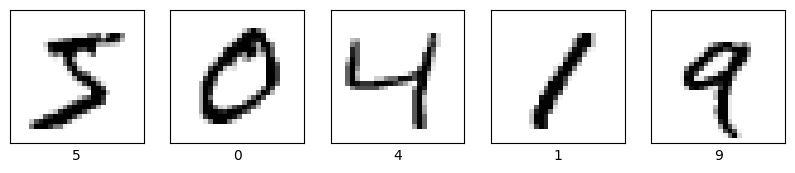

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* Now let's review how to classify the MNIST data set with a simple CNN

In [3]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

del train_images
del test_images

Epoch 1/5


  1/844 [..............................] - ETA: 3:39 - loss: 2.3012 - accuracy: 0.0938

  6/844 [..............................] - ETA: 8s - loss: 2.2503 - accuracy: 0.2474  

 11/844 [..............................] - ETA: 8s - loss: 2.1717 - accuracy: 0.2940

 16/844 [..............................] - ETA: 8s - loss: 2.0678 - accuracy: 0.3750

 21/844 [..............................] - ETA: 8s - loss: 1.9270 - accuracy: 0.4219

 26/844 [..............................] - ETA: 8s - loss: 1.7615 - accuracy: 0.4778

 31/844 [>.............................] - ETA: 8s - loss: 1.5895 - accuracy: 0.5237

 36/844 [>.............................] - ETA: 8s - loss: 1.4548 - accuracy: 0.5642

 41/844 [>.............................] - ETA: 8s - loss: 1.3464 - accuracy: 0.5960

 46/844 [>.............................] - ETA: 8s - loss: 1.2629 - accuracy: 0.6185

 51/844 [>.............................] - ETA: 8s - loss: 1.1862 - accuracy: 0.6391

 56/844 [>.............................] - ETA: 8s - loss: 1.1307 - accuracy: 0.6554

 61/844 [=>............................] - ETA: 8s - loss: 1.0793 - accuracy: 0.6698

 66/844 [=>............................] - ETA: 8s - loss: 1.0289 - accuracy: 0.6856

 71/844 [=>............................] - ETA: 8s - loss: 0.9826 - accuracy: 0.6998

 76/844 [=>............................] - ETA: 8s - loss: 0.9429 - accuracy: 0.7113

 81/844 [=>............................] - ETA: 8s - loss: 0.9118 - accuracy: 0.7215

 86/844 [==>...........................] - ETA: 8s - loss: 0.8837 - accuracy: 0.7298

 91/844 [==>...........................] - ETA: 8s - loss: 0.8516 - accuracy: 0.7394

 96/844 [==>...........................] - ETA: 8s - loss: 0.8246 - accuracy: 0.7479

101/844 [==>...........................] - ETA: 8s - loss: 0.8016 - accuracy: 0.7546

106/844 [==>...........................] - ETA: 8s - loss: 0.7781 - accuracy: 0.7630

111/844 [==>...........................] - ETA: 7s - loss: 0.7596 - accuracy: 0.7687

116/844 [===>..........................] - ETA: 7s - loss: 0.7370 - accuracy: 0.7755

121/844 [===>..........................] - ETA: 7s - loss: 0.7184 - accuracy: 0.7806

126/844 [===>..........................] - ETA: 7s - loss: 0.6993 - accuracy: 0.7866

131/844 [===>..........................] - ETA: 7s - loss: 0.6812 - accuracy: 0.7916

136/844 [===>..........................] - ETA: 7s - loss: 0.6649 - accuracy: 0.7966

141/844 [====>.........................] - ETA: 7s - loss: 0.6474 - accuracy: 0.8015

146/844 [====>.........................] - ETA: 7s - loss: 0.6336 - accuracy: 0.8058

151/844 [====>.........................] - ETA: 7s - loss: 0.6187 - accuracy: 0.8105

156/844 [====>.........................] - ETA: 7s - loss: 0.6066 - accuracy: 0.8145

161/844 [====>.........................] - ETA: 7s - loss: 0.5956 - accuracy: 0.8178

166/844 [====>.........................] - ETA: 7s - loss: 0.5856 - accuracy: 0.8208

171/844 [=====>........................] - ETA: 7s - loss: 0.5760 - accuracy: 0.8232

176/844 [=====>........................] - ETA: 7s - loss: 0.5664 - accuracy: 0.8259

181/844 [=====>........................] - ETA: 7s - loss: 0.5575 - accuracy: 0.8288

186/844 [=====>........................] - ETA: 7s - loss: 0.5473 - accuracy: 0.8323

191/844 [=====>........................] - ETA: 7s - loss: 0.5385 - accuracy: 0.8349

196/844 [=====>........................] - ETA: 7s - loss: 0.5286 - accuracy: 0.8378

201/844 [======>.......................] - ETA: 6s - loss: 0.5201 - accuracy: 0.8403

206/844 [======>.......................] - ETA: 6s - loss: 0.5115 - accuracy: 0.8428

211/844 [======>.......................] - ETA: 6s - loss: 0.5031 - accuracy: 0.8452

216/844 [======>.......................] - ETA: 6s - loss: 0.4946 - accuracy: 0.8477

221/844 [======>.......................] - ETA: 6s - loss: 0.4879 - accuracy: 0.8496

226/844 [=======>......................] - ETA: 6s - loss: 0.4809 - accuracy: 0.8516

231/844 [=======>......................] - ETA: 6s - loss: 0.4741 - accuracy: 0.8536

236/844 [=======>......................] - ETA: 6s - loss: 0.4679 - accuracy: 0.8556

241/844 [=======>......................] - ETA: 6s - loss: 0.4613 - accuracy: 0.8578

246/844 [=======>......................] - ETA: 6s - loss: 0.4546 - accuracy: 0.8598

251/844 [=======>......................] - ETA: 6s - loss: 0.4491 - accuracy: 0.8616

256/844 [========>.....................] - ETA: 6s - loss: 0.4442 - accuracy: 0.8629

261/844 [========>.....................] - ETA: 6s - loss: 0.4394 - accuracy: 0.8645

266/844 [========>.....................] - ETA: 6s - loss: 0.4340 - accuracy: 0.8662

270/844 [========>.....................] - ETA: 6s - loss: 0.4296 - accuracy: 0.8676

274/844 [========>.....................] - ETA: 6s - loss: 0.4254 - accuracy: 0.8688

278/844 [========>.....................] - ETA: 6s - loss: 0.4223 - accuracy: 0.8698

283/844 [=========>....................] - ETA: 6s - loss: 0.4179 - accuracy: 0.8711

286/844 [=========>....................] - ETA: 6s - loss: 0.4152 - accuracy: 0.8717

291/844 [=========>....................] - ETA: 6s - loss: 0.4109 - accuracy: 0.8729

296/844 [=========>....................] - ETA: 6s - loss: 0.4066 - accuracy: 0.8741

301/844 [=========>....................] - ETA: 6s - loss: 0.4019 - accuracy: 0.8753

305/844 [=========>....................] - ETA: 6s - loss: 0.3981 - accuracy: 0.8764

309/844 [=========>....................] - ETA: 5s - loss: 0.3944 - accuracy: 0.8776

313/844 [==========>...................] - ETA: 5s - loss: 0.3911 - accuracy: 0.8785

316/844 [==========>...................] - ETA: 5s - loss: 0.3886 - accuracy: 0.8794

319/844 [==========>...................] - ETA: 5s - loss: 0.3858 - accuracy: 0.8801

322/844 [==========>...................] - ETA: 5s - loss: 0.3839 - accuracy: 0.8806

325/844 [==========>...................] - ETA: 5s - loss: 0.3817 - accuracy: 0.8813

328/844 [==========>...................] - ETA: 5s - loss: 0.3793 - accuracy: 0.8820

331/844 [==========>...................] - ETA: 5s - loss: 0.3771 - accuracy: 0.8828

334/844 [==========>...................] - ETA: 5s - loss: 0.3743 - accuracy: 0.8836

337/844 [==========>...................] - ETA: 5s - loss: 0.3727 - accuracy: 0.8842

340/844 [===========>..................] - ETA: 5s - loss: 0.3703 - accuracy: 0.8849

343/844 [===========>..................] - ETA: 5s - loss: 0.3680 - accuracy: 0.8854

346/844 [===========>..................] - ETA: 5s - loss: 0.3656 - accuracy: 0.8861

348/844 [===========>..................] - ETA: 5s - loss: 0.3644 - accuracy: 0.8865

351/844 [===========>..................] - ETA: 5s - loss: 0.3622 - accuracy: 0.8872

354/844 [===========>..................] - ETA: 5s - loss: 0.3607 - accuracy: 0.8878

357/844 [===========>..................] - ETA: 5s - loss: 0.3590 - accuracy: 0.8882

360/844 [===========>..................] - ETA: 5s - loss: 0.3567 - accuracy: 0.8889

363/844 [===========>..................] - ETA: 5s - loss: 0.3548 - accuracy: 0.8895

366/844 [============>.................] - ETA: 5s - loss: 0.3531 - accuracy: 0.8899

369/844 [============>.................] - ETA: 5s - loss: 0.3506 - accuracy: 0.8908

372/844 [============>.................] - ETA: 5s - loss: 0.3486 - accuracy: 0.8914

375/844 [============>.................] - ETA: 5s - loss: 0.3468 - accuracy: 0.8920

378/844 [============>.................] - ETA: 5s - loss: 0.3448 - accuracy: 0.8927

381/844 [============>.................] - ETA: 5s - loss: 0.3430 - accuracy: 0.8932

384/844 [============>.................] - ETA: 5s - loss: 0.3411 - accuracy: 0.8938

387/844 [============>.................] - ETA: 5s - loss: 0.3394 - accuracy: 0.8944

390/844 [============>.................] - ETA: 5s - loss: 0.3378 - accuracy: 0.8948

393/844 [============>.................] - ETA: 5s - loss: 0.3358 - accuracy: 0.8954

396/844 [=============>................] - ETA: 5s - loss: 0.3342 - accuracy: 0.8959

399/844 [=============>................] - ETA: 5s - loss: 0.3324 - accuracy: 0.8965

401/844 [=============>................] - ETA: 5s - loss: 0.3311 - accuracy: 0.8969

403/844 [=============>................] - ETA: 5s - loss: 0.3303 - accuracy: 0.8971

406/844 [=============>................] - ETA: 5s - loss: 0.3288 - accuracy: 0.8976

409/844 [=============>................] - ETA: 5s - loss: 0.3270 - accuracy: 0.8982

412/844 [=============>................] - ETA: 5s - loss: 0.3252 - accuracy: 0.8987

414/844 [=============>................] - ETA: 5s - loss: 0.3242 - accuracy: 0.8990

416/844 [=============>................] - ETA: 5s - loss: 0.3230 - accuracy: 0.8993

419/844 [=============>................] - ETA: 5s - loss: 0.3218 - accuracy: 0.8997

422/844 [==============>...............] - ETA: 5s - loss: 0.3203 - accuracy: 0.9002

425/844 [==============>...............] - ETA: 5s - loss: 0.3188 - accuracy: 0.9007

428/844 [==============>...............] - ETA: 5s - loss: 0.3171 - accuracy: 0.9012

430/844 [==============>...............] - ETA: 5s - loss: 0.3163 - accuracy: 0.9014

433/844 [==============>...............] - ETA: 5s - loss: 0.3148 - accuracy: 0.9018

436/844 [==============>...............] - ETA: 5s - loss: 0.3132 - accuracy: 0.9022

439/844 [==============>...............] - ETA: 5s - loss: 0.3116 - accuracy: 0.9028

442/844 [==============>...............] - ETA: 5s - loss: 0.3100 - accuracy: 0.9032

445/844 [==============>...............] - ETA: 5s - loss: 0.3085 - accuracy: 0.9038

447/844 [==============>...............] - ETA: 5s - loss: 0.3073 - accuracy: 0.9042

449/844 [==============>...............] - ETA: 5s - loss: 0.3064 - accuracy: 0.9045

451/844 [===============>..............] - ETA: 5s - loss: 0.3055 - accuracy: 0.9048

454/844 [===============>..............] - ETA: 5s - loss: 0.3045 - accuracy: 0.9052

457/844 [===============>..............] - ETA: 5s - loss: 0.3035 - accuracy: 0.9055

460/844 [===============>..............] - ETA: 5s - loss: 0.3018 - accuracy: 0.9060

463/844 [===============>..............] - ETA: 5s - loss: 0.3005 - accuracy: 0.9064

466/844 [===============>..............] - ETA: 5s - loss: 0.2989 - accuracy: 0.9069

469/844 [===============>..............] - ETA: 5s - loss: 0.2978 - accuracy: 0.9072

472/844 [===============>..............] - ETA: 5s - loss: 0.2964 - accuracy: 0.9077

475/844 [===============>..............] - ETA: 5s - loss: 0.2950 - accuracy: 0.9082

478/844 [===============>..............] - ETA: 5s - loss: 0.2938 - accuracy: 0.9085

481/844 [================>.............] - ETA: 5s - loss: 0.2926 - accuracy: 0.9088

484/844 [================>.............] - ETA: 5s - loss: 0.2913 - accuracy: 0.9093

487/844 [================>.............] - ETA: 5s - loss: 0.2904 - accuracy: 0.9095

490/844 [================>.............] - ETA: 5s - loss: 0.2895 - accuracy: 0.9098

493/844 [================>.............] - ETA: 5s - loss: 0.2884 - accuracy: 0.9102

496/844 [================>.............] - ETA: 5s - loss: 0.2875 - accuracy: 0.9105

499/844 [================>.............] - ETA: 5s - loss: 0.2864 - accuracy: 0.9109

502/844 [================>.............] - ETA: 5s - loss: 0.2859 - accuracy: 0.9111

505/844 [================>.............] - ETA: 4s - loss: 0.2845 - accuracy: 0.9115

508/844 [=================>............] - ETA: 4s - loss: 0.2834 - accuracy: 0.9119

511/844 [=================>............] - ETA: 4s - loss: 0.2824 - accuracy: 0.9123

514/844 [=================>............] - ETA: 4s - loss: 0.2812 - accuracy: 0.9126

517/844 [=================>............] - ETA: 4s - loss: 0.2804 - accuracy: 0.9129

520/844 [=================>............] - ETA: 4s - loss: 0.2796 - accuracy: 0.9132

523/844 [=================>............] - ETA: 4s - loss: 0.2784 - accuracy: 0.9136

526/844 [=================>............] - ETA: 4s - loss: 0.2775 - accuracy: 0.9139

528/844 [=================>............] - ETA: 4s - loss: 0.2769 - accuracy: 0.9141

531/844 [=================>............] - ETA: 4s - loss: 0.2758 - accuracy: 0.9145

534/844 [=================>............] - ETA: 4s - loss: 0.2748 - accuracy: 0.9148

537/844 [==================>...........] - ETA: 4s - loss: 0.2738 - accuracy: 0.9151

540/844 [==================>...........] - ETA: 4s - loss: 0.2727 - accuracy: 0.9154

543/844 [==================>...........] - ETA: 4s - loss: 0.2716 - accuracy: 0.9157

546/844 [==================>...........] - ETA: 4s - loss: 0.2704 - accuracy: 0.9161

549/844 [==================>...........] - ETA: 4s - loss: 0.2698 - accuracy: 0.9163

552/844 [==================>...........] - ETA: 4s - loss: 0.2687 - accuracy: 0.9167

555/844 [==================>...........] - ETA: 4s - loss: 0.2677 - accuracy: 0.9169

558/844 [==================>...........] - ETA: 4s - loss: 0.2669 - accuracy: 0.9172

561/844 [==================>...........] - ETA: 4s - loss: 0.2662 - accuracy: 0.9174

564/844 [===================>..........] - ETA: 4s - loss: 0.2652 - accuracy: 0.9177

567/844 [===================>..........] - ETA: 4s - loss: 0.2643 - accuracy: 0.9180

570/844 [===================>..........] - ETA: 4s - loss: 0.2633 - accuracy: 0.9183

573/844 [===================>..........] - ETA: 4s - loss: 0.2622 - accuracy: 0.9186

576/844 [===================>..........] - ETA: 4s - loss: 0.2611 - accuracy: 0.9190

579/844 [===================>..........] - ETA: 4s - loss: 0.2601 - accuracy: 0.9193

582/844 [===================>..........] - ETA: 4s - loss: 0.2591 - accuracy: 0.9196

585/844 [===================>..........] - ETA: 4s - loss: 0.2581 - accuracy: 0.9199

588/844 [===================>..........] - ETA: 3s - loss: 0.2573 - accuracy: 0.9202

591/844 [====================>.........] - ETA: 3s - loss: 0.2564 - accuracy: 0.9204

594/844 [====================>.........] - ETA: 3s - loss: 0.2557 - accuracy: 0.9207

597/844 [====================>.........] - ETA: 3s - loss: 0.2550 - accuracy: 0.9209

600/844 [====================>.........] - ETA: 3s - loss: 0.2543 - accuracy: 0.9211

603/844 [====================>.........] - ETA: 3s - loss: 0.2536 - accuracy: 0.9213

606/844 [====================>.........] - ETA: 3s - loss: 0.2526 - accuracy: 0.9216

609/844 [====================>.........] - ETA: 3s - loss: 0.2521 - accuracy: 0.9218

611/844 [====================>.........] - ETA: 3s - loss: 0.2519 - accuracy: 0.9218

614/844 [====================>.........] - ETA: 3s - loss: 0.2511 - accuracy: 0.9221

617/844 [====================>.........] - ETA: 3s - loss: 0.2502 - accuracy: 0.9223

620/844 [=====================>........] - ETA: 3s - loss: 0.2497 - accuracy: 0.9225

623/844 [=====================>........] - ETA: 3s - loss: 0.2489 - accuracy: 0.9228

626/844 [=====================>........] - ETA: 3s - loss: 0.2482 - accuracy: 0.9230

628/844 [=====================>........] - ETA: 3s - loss: 0.2476 - accuracy: 0.9231

631/844 [=====================>........] - ETA: 3s - loss: 0.2469 - accuracy: 0.9233

634/844 [=====================>........] - ETA: 3s - loss: 0.2461 - accuracy: 0.9236

637/844 [=====================>........] - ETA: 3s - loss: 0.2454 - accuracy: 0.9238

640/844 [=====================>........] - ETA: 3s - loss: 0.2448 - accuracy: 0.9240

642/844 [=====================>........] - ETA: 3s - loss: 0.2444 - accuracy: 0.9241

645/844 [=====================>........] - ETA: 3s - loss: 0.2435 - accuracy: 0.9243

648/844 [======================>.......] - ETA: 3s - loss: 0.2428 - accuracy: 0.9246

651/844 [======================>.......] - ETA: 3s - loss: 0.2421 - accuracy: 0.9248

654/844 [======================>.......] - ETA: 3s - loss: 0.2413 - accuracy: 0.9250

657/844 [======================>.......] - ETA: 2s - loss: 0.2405 - accuracy: 0.9253

660/844 [======================>.......] - ETA: 2s - loss: 0.2400 - accuracy: 0.9255

663/844 [======================>.......] - ETA: 2s - loss: 0.2391 - accuracy: 0.9258

666/844 [======================>.......] - ETA: 2s - loss: 0.2385 - accuracy: 0.9260

669/844 [======================>.......] - ETA: 2s - loss: 0.2377 - accuracy: 0.9262

672/844 [======================>.......] - ETA: 2s - loss: 0.2370 - accuracy: 0.9265

675/844 [======================>.......] - ETA: 2s - loss: 0.2363 - accuracy: 0.9267

678/844 [=======================>......] - ETA: 2s - loss: 0.2356 - accuracy: 0.9270

679/844 [=======================>......] - ETA: 2s - loss: 0.2357 - accuracy: 0.9270

681/844 [=======================>......] - ETA: 2s - loss: 0.2351 - accuracy: 0.9271

683/844 [=======================>......] - ETA: 2s - loss: 0.2346 - accuracy: 0.9273

686/844 [=======================>......] - ETA: 2s - loss: 0.2339 - accuracy: 0.9275

689/844 [=======================>......] - ETA: 2s - loss: 0.2331 - accuracy: 0.9277

692/844 [=======================>......] - ETA: 2s - loss: 0.2325 - accuracy: 0.9279

695/844 [=======================>......] - ETA: 2s - loss: 0.2318 - accuracy: 0.9281

698/844 [=======================>......] - ETA: 2s - loss: 0.2312 - accuracy: 0.9283

701/844 [=======================>......] - ETA: 2s - loss: 0.2306 - accuracy: 0.9285

704/844 [========================>.....] - ETA: 2s - loss: 0.2298 - accuracy: 0.9288

707/844 [========================>.....] - ETA: 2s - loss: 0.2290 - accuracy: 0.9290

710/844 [========================>.....] - ETA: 2s - loss: 0.2283 - accuracy: 0.9292

713/844 [========================>.....] - ETA: 2s - loss: 0.2276 - accuracy: 0.9293

715/844 [========================>.....] - ETA: 2s - loss: 0.2275 - accuracy: 0.9294

717/844 [========================>.....] - ETA: 2s - loss: 0.2270 - accuracy: 0.9296

719/844 [========================>.....] - ETA: 2s - loss: 0.2265 - accuracy: 0.9297

722/844 [========================>.....] - ETA: 2s - loss: 0.2259 - accuracy: 0.9299

725/844 [========================>.....] - ETA: 1s - loss: 0.2252 - accuracy: 0.9301

728/844 [========================>.....] - ETA: 1s - loss: 0.2245 - accuracy: 0.9303

731/844 [========================>.....] - ETA: 1s - loss: 0.2240 - accuracy: 0.9304

734/844 [=========================>....] - ETA: 1s - loss: 0.2235 - accuracy: 0.9306

737/844 [=========================>....] - ETA: 1s - loss: 0.2226 - accuracy: 0.9308

740/844 [=========================>....] - ETA: 1s - loss: 0.2219 - accuracy: 0.9311

743/844 [=========================>....] - ETA: 1s - loss: 0.2212 - accuracy: 0.9313

746/844 [=========================>....] - ETA: 1s - loss: 0.2207 - accuracy: 0.9315

749/844 [=========================>....] - ETA: 1s - loss: 0.2200 - accuracy: 0.9317

752/844 [=========================>....] - ETA: 1s - loss: 0.2194 - accuracy: 0.9319

755/844 [=========================>....] - ETA: 1s - loss: 0.2189 - accuracy: 0.9321

758/844 [=========================>....] - ETA: 1s - loss: 0.2182 - accuracy: 0.9322

761/844 [==========================>...] - ETA: 1s - loss: 0.2178 - accuracy: 0.9324

764/844 [==========================>...] - ETA: 1s - loss: 0.2174 - accuracy: 0.9326

766/844 [==========================>...] - ETA: 1s - loss: 0.2168 - accuracy: 0.9327

769/844 [==========================>...] - ETA: 1s - loss: 0.2163 - accuracy: 0.9329

771/844 [==========================>...] - ETA: 1s - loss: 0.2160 - accuracy: 0.9330

773/844 [==========================>...] - ETA: 1s - loss: 0.2156 - accuracy: 0.9331

775/844 [==========================>...] - ETA: 1s - loss: 0.2152 - accuracy: 0.9332

777/844 [==========================>...] - ETA: 1s - loss: 0.2148 - accuracy: 0.9333

780/844 [==========================>...] - ETA: 1s - loss: 0.2143 - accuracy: 0.9335

784/844 [==========================>...] - ETA: 1s - loss: 0.2139 - accuracy: 0.9336

787/844 [==========================>...] - ETA: 0s - loss: 0.2134 - accuracy: 0.9338

790/844 [===========================>..] - ETA: 0s - loss: 0.2128 - accuracy: 0.9340

793/844 [===========================>..] - ETA: 0s - loss: 0.2122 - accuracy: 0.9342

796/844 [===========================>..] - ETA: 0s - loss: 0.2118 - accuracy: 0.9342

799/844 [===========================>..] - ETA: 0s - loss: 0.2113 - accuracy: 0.9344

802/844 [===========================>..] - ETA: 0s - loss: 0.2108 - accuracy: 0.9345

805/844 [===========================>..] - ETA: 0s - loss: 0.2104 - accuracy: 0.9346

809/844 [===========================>..] - ETA: 0s - loss: 0.2099 - accuracy: 0.9348

812/844 [===========================>..] - ETA: 0s - loss: 0.2094 - accuracy: 0.9349

815/844 [===========================>..] - ETA: 0s - loss: 0.2090 - accuracy: 0.9350

818/844 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9352

821/844 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9354

824/844 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9355

827/844 [============================>.] - ETA: 0s - loss: 0.2069 - accuracy: 0.9357

831/844 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9359

834/844 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9360

837/844 [============================>.] - ETA: 0s - loss: 0.2053 - accuracy: 0.9362

840/844 [============================>.] - ETA: 0s - loss: 0.2048 - accuracy: 0.9363

843/844 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9365

844/844 [==============================] - 15s 18ms/step - loss: 0.2043 - accuracy: 0.9365 - val_loss: 0.0586 - val_accuracy: 0.9817


Epoch 2/5


  1/844 [..............................] - ETA: 15s - loss: 0.0123 - accuracy: 1.0000

  4/844 [..............................] - ETA: 15s - loss: 0.0291 - accuracy: 0.9922

  7/844 [..............................] - ETA: 15s - loss: 0.0412 - accuracy: 0.9888

 10/844 [..............................] - ETA: 15s - loss: 0.0356 - accuracy: 0.9906

 13/844 [..............................] - ETA: 15s - loss: 0.0365 - accuracy: 0.9892

 16/844 [..............................] - ETA: 15s - loss: 0.0394 - accuracy: 0.9863

 19/844 [..............................] - ETA: 16s - loss: 0.0546 - accuracy: 0.9836

 22/844 [..............................] - ETA: 16s - loss: 0.0516 - accuracy: 0.9851

 26/844 [..............................] - ETA: 15s - loss: 0.0488 - accuracy: 0.9856

 29/844 [>.............................] - ETA: 15s - loss: 0.0544 - accuracy: 0.9822

 32/844 [>.............................] - ETA: 15s - loss: 0.0567 - accuracy: 0.9814

 35/844 [>.............................] - ETA: 15s - loss: 0.0654 - accuracy: 0.9786

 38/844 [>.............................] - ETA: 15s - loss: 0.0643 - accuracy: 0.9786

 41/844 [>.............................] - ETA: 15s - loss: 0.0655 - accuracy: 0.9787

 44/844 [>.............................] - ETA: 15s - loss: 0.0637 - accuracy: 0.9794

 47/844 [>.............................] - ETA: 15s - loss: 0.0631 - accuracy: 0.9794

 50/844 [>.............................] - ETA: 15s - loss: 0.0614 - accuracy: 0.9800

 53/844 [>.............................] - ETA: 15s - loss: 0.0623 - accuracy: 0.9800

 55/844 [>.............................] - ETA: 15s - loss: 0.0638 - accuracy: 0.9795

 58/844 [=>............................] - ETA: 15s - loss: 0.0625 - accuracy: 0.9801

 61/844 [=>............................] - ETA: 15s - loss: 0.0643 - accuracy: 0.9795

 64/844 [=>............................] - ETA: 15s - loss: 0.0667 - accuracy: 0.9785

 67/844 [=>............................] - ETA: 15s - loss: 0.0668 - accuracy: 0.9785

 69/844 [=>............................] - ETA: 15s - loss: 0.0671 - accuracy: 0.9783

 72/844 [=>............................] - ETA: 15s - loss: 0.0658 - accuracy: 0.9785

 75/844 [=>............................] - ETA: 15s - loss: 0.0666 - accuracy: 0.9783

 78/844 [=>............................] - ETA: 15s - loss: 0.0655 - accuracy: 0.9788

 81/844 [=>............................] - ETA: 15s - loss: 0.0656 - accuracy: 0.9788

 84/844 [=>............................] - ETA: 14s - loss: 0.0662 - accuracy: 0.9788

 87/844 [==>...........................] - ETA: 14s - loss: 0.0663 - accuracy: 0.9784

 90/844 [==>...........................] - ETA: 14s - loss: 0.0663 - accuracy: 0.9788

 93/844 [==>...........................] - ETA: 14s - loss: 0.0667 - accuracy: 0.9790

 96/844 [==>...........................] - ETA: 14s - loss: 0.0691 - accuracy: 0.9787

 99/844 [==>...........................] - ETA: 14s - loss: 0.0683 - accuracy: 0.9787

102/844 [==>...........................] - ETA: 14s - loss: 0.0684 - accuracy: 0.9786

105/844 [==>...........................] - ETA: 14s - loss: 0.0673 - accuracy: 0.9790

107/844 [==>...........................] - ETA: 14s - loss: 0.0669 - accuracy: 0.9790

109/844 [==>...........................] - ETA: 14s - loss: 0.0660 - accuracy: 0.9794

111/844 [==>...........................] - ETA: 14s - loss: 0.0674 - accuracy: 0.9790

113/844 [===>..........................] - ETA: 14s - loss: 0.0668 - accuracy: 0.9791

115/844 [===>..........................] - ETA: 15s - loss: 0.0664 - accuracy: 0.9793

118/844 [===>..........................] - ETA: 14s - loss: 0.0660 - accuracy: 0.9796

121/844 [===>..........................] - ETA: 14s - loss: 0.0654 - accuracy: 0.9801

125/844 [===>..........................] - ETA: 14s - loss: 0.0655 - accuracy: 0.9800

128/844 [===>..........................] - ETA: 14s - loss: 0.0648 - accuracy: 0.9803

131/844 [===>..........................] - ETA: 14s - loss: 0.0647 - accuracy: 0.9804

134/844 [===>..........................] - ETA: 14s - loss: 0.0642 - accuracy: 0.9804

137/844 [===>..........................] - ETA: 14s - loss: 0.0635 - accuracy: 0.9805

140/844 [===>..........................] - ETA: 14s - loss: 0.0629 - accuracy: 0.9807

143/844 [====>.........................] - ETA: 14s - loss: 0.0622 - accuracy: 0.9809

146/844 [====>.........................] - ETA: 14s - loss: 0.0623 - accuracy: 0.9808

149/844 [====>.........................] - ETA: 14s - loss: 0.0616 - accuracy: 0.9812

151/844 [====>.........................] - ETA: 14s - loss: 0.0610 - accuracy: 0.9815

153/844 [====>.........................] - ETA: 14s - loss: 0.0612 - accuracy: 0.9814

156/844 [====>.........................] - ETA: 14s - loss: 0.0611 - accuracy: 0.9813

159/844 [====>.........................] - ETA: 13s - loss: 0.0607 - accuracy: 0.9813

162/844 [====>.........................] - ETA: 13s - loss: 0.0607 - accuracy: 0.9814

165/844 [====>.........................] - ETA: 13s - loss: 0.0609 - accuracy: 0.9815

168/844 [====>.........................] - ETA: 13s - loss: 0.0611 - accuracy: 0.9816

171/844 [=====>........................] - ETA: 13s - loss: 0.0610 - accuracy: 0.9815

174/844 [=====>........................] - ETA: 13s - loss: 0.0607 - accuracy: 0.9815

177/844 [=====>........................] - ETA: 13s - loss: 0.0605 - accuracy: 0.9815

180/844 [=====>........................] - ETA: 13s - loss: 0.0600 - accuracy: 0.9817

183/844 [=====>........................] - ETA: 13s - loss: 0.0597 - accuracy: 0.9818

186/844 [=====>........................] - ETA: 13s - loss: 0.0602 - accuracy: 0.9818

189/844 [=====>........................] - ETA: 13s - loss: 0.0599 - accuracy: 0.9819

192/844 [=====>........................] - ETA: 13s - loss: 0.0605 - accuracy: 0.9815

195/844 [=====>........................] - ETA: 13s - loss: 0.0606 - accuracy: 0.9813

198/844 [======>.......................] - ETA: 13s - loss: 0.0610 - accuracy: 0.9815

201/844 [======>.......................] - ETA: 13s - loss: 0.0609 - accuracy: 0.9814

204/844 [======>.......................] - ETA: 13s - loss: 0.0608 - accuracy: 0.9815

205/844 [======>.......................] - ETA: 13s - loss: 0.0605 - accuracy: 0.9816

206/844 [======>.......................] - ETA: 13s - loss: 0.0606 - accuracy: 0.9816

209/844 [======>.......................] - ETA: 13s - loss: 0.0606 - accuracy: 0.9815

212/844 [======>.......................] - ETA: 13s - loss: 0.0603 - accuracy: 0.9816

215/844 [======>.......................] - ETA: 13s - loss: 0.0607 - accuracy: 0.9815

217/844 [======>.......................] - ETA: 13s - loss: 0.0603 - accuracy: 0.9816

219/844 [======>.......................] - ETA: 13s - loss: 0.0603 - accuracy: 0.9816

222/844 [======>.......................] - ETA: 13s - loss: 0.0603 - accuracy: 0.9814

225/844 [======>.......................] - ETA: 13s - loss: 0.0605 - accuracy: 0.9814

228/844 [=======>......................] - ETA: 13s - loss: 0.0604 - accuracy: 0.9814

231/844 [=======>......................] - ETA: 13s - loss: 0.0607 - accuracy: 0.9812

234/844 [=======>......................] - ETA: 12s - loss: 0.0602 - accuracy: 0.9814

237/844 [=======>......................] - ETA: 12s - loss: 0.0605 - accuracy: 0.9812

240/844 [=======>......................] - ETA: 12s - loss: 0.0602 - accuracy: 0.9812

243/844 [=======>......................] - ETA: 12s - loss: 0.0602 - accuracy: 0.9812

246/844 [=======>......................] - ETA: 12s - loss: 0.0604 - accuracy: 0.9812

249/844 [=======>......................] - ETA: 12s - loss: 0.0599 - accuracy: 0.9814

252/844 [=======>......................] - ETA: 12s - loss: 0.0599 - accuracy: 0.9815

255/844 [========>.....................] - ETA: 12s - loss: 0.0597 - accuracy: 0.9816

258/844 [========>.....................] - ETA: 12s - loss: 0.0599 - accuracy: 0.9816

261/844 [========>.....................] - ETA: 12s - loss: 0.0598 - accuracy: 0.9816

264/844 [========>.....................] - ETA: 12s - loss: 0.0599 - accuracy: 0.9816

267/844 [========>.....................] - ETA: 12s - loss: 0.0595 - accuracy: 0.9817

270/844 [========>.....................] - ETA: 12s - loss: 0.0591 - accuracy: 0.9818

273/844 [========>.....................] - ETA: 12s - loss: 0.0594 - accuracy: 0.9817

276/844 [========>.....................] - ETA: 12s - loss: 0.0592 - accuracy: 0.9818

279/844 [========>.....................] - ETA: 11s - loss: 0.0596 - accuracy: 0.9817

282/844 [=========>....................] - ETA: 11s - loss: 0.0592 - accuracy: 0.9817

285/844 [=========>....................] - ETA: 11s - loss: 0.0591 - accuracy: 0.9818

288/844 [=========>....................] - ETA: 11s - loss: 0.0598 - accuracy: 0.9815

291/844 [=========>....................] - ETA: 11s - loss: 0.0600 - accuracy: 0.9815

294/844 [=========>....................] - ETA: 11s - loss: 0.0596 - accuracy: 0.9816

297/844 [=========>....................] - ETA: 11s - loss: 0.0595 - accuracy: 0.9816

300/844 [=========>....................] - ETA: 11s - loss: 0.0597 - accuracy: 0.9816

303/844 [=========>....................] - ETA: 11s - loss: 0.0603 - accuracy: 0.9814

306/844 [=========>....................] - ETA: 11s - loss: 0.0600 - accuracy: 0.9815

309/844 [=========>....................] - ETA: 11s - loss: 0.0600 - accuracy: 0.9814

312/844 [==========>...................] - ETA: 11s - loss: 0.0596 - accuracy: 0.9816

315/844 [==========>...................] - ETA: 11s - loss: 0.0596 - accuracy: 0.9815

318/844 [==========>...................] - ETA: 11s - loss: 0.0592 - accuracy: 0.9817

321/844 [==========>...................] - ETA: 11s - loss: 0.0595 - accuracy: 0.9816

324/844 [==========>...................] - ETA: 10s - loss: 0.0594 - accuracy: 0.9816

327/844 [==========>...................] - ETA: 10s - loss: 0.0593 - accuracy: 0.9817

330/844 [==========>...................] - ETA: 10s - loss: 0.0592 - accuracy: 0.9817

333/844 [==========>...................] - ETA: 10s - loss: 0.0594 - accuracy: 0.9817

336/844 [==========>...................] - ETA: 10s - loss: 0.0592 - accuracy: 0.9818

339/844 [===========>..................] - ETA: 10s - loss: 0.0590 - accuracy: 0.9818

342/844 [===========>..................] - ETA: 10s - loss: 0.0587 - accuracy: 0.9820

345/844 [===========>..................] - ETA: 10s - loss: 0.0588 - accuracy: 0.9820

347/844 [===========>..................] - ETA: 10s - loss: 0.0585 - accuracy: 0.9821

349/844 [===========>..................] - ETA: 10s - loss: 0.0583 - accuracy: 0.9821

352/844 [===========>..................] - ETA: 10s - loss: 0.0582 - accuracy: 0.9821

355/844 [===========>..................] - ETA: 10s - loss: 0.0581 - accuracy: 0.9821

357/844 [===========>..................] - ETA: 10s - loss: 0.0581 - accuracy: 0.9821

359/844 [===========>..................] - ETA: 10s - loss: 0.0580 - accuracy: 0.9821

361/844 [===========>..................] - ETA: 10s - loss: 0.0580 - accuracy: 0.9821

363/844 [===========>..................] - ETA: 10s - loss: 0.0580 - accuracy: 0.9821

365/844 [===========>..................] - ETA: 10s - loss: 0.0578 - accuracy: 0.9821

367/844 [============>.................] - ETA: 10s - loss: 0.0576 - accuracy: 0.9822

369/844 [============>.................] - ETA: 10s - loss: 0.0575 - accuracy: 0.9823

371/844 [============>.................] - ETA: 10s - loss: 0.0575 - accuracy: 0.9823

373/844 [============>.................] - ETA: 10s - loss: 0.0575 - accuracy: 0.9823

374/844 [============>.................] - ETA: 10s - loss: 0.0574 - accuracy: 0.9823

376/844 [============>.................] - ETA: 10s - loss: 0.0576 - accuracy: 0.9823

379/844 [============>.................] - ETA: 10s - loss: 0.0581 - accuracy: 0.9820

382/844 [============>.................] - ETA: 10s - loss: 0.0580 - accuracy: 0.9821

385/844 [============>.................] - ETA: 9s - loss: 0.0583 - accuracy: 0.9820 

388/844 [============>.................] - ETA: 9s - loss: 0.0588 - accuracy: 0.9818

391/844 [============>.................] - ETA: 9s - loss: 0.0586 - accuracy: 0.9818

394/844 [=============>................] - ETA: 9s - loss: 0.0583 - accuracy: 0.9819

398/844 [=============>................] - ETA: 9s - loss: 0.0581 - accuracy: 0.9820

401/844 [=============>................] - ETA: 9s - loss: 0.0579 - accuracy: 0.9821

404/844 [=============>................] - ETA: 9s - loss: 0.0579 - accuracy: 0.9820

406/844 [=============>................] - ETA: 9s - loss: 0.0577 - accuracy: 0.9821

409/844 [=============>................] - ETA: 9s - loss: 0.0575 - accuracy: 0.9822

412/844 [=============>................] - ETA: 9s - loss: 0.0573 - accuracy: 0.9822

415/844 [=============>................] - ETA: 9s - loss: 0.0574 - accuracy: 0.9822

418/844 [=============>................] - ETA: 9s - loss: 0.0573 - accuracy: 0.9822

421/844 [=============>................] - ETA: 9s - loss: 0.0574 - accuracy: 0.9821

425/844 [==============>...............] - ETA: 9s - loss: 0.0571 - accuracy: 0.9823

428/844 [==============>...............] - ETA: 8s - loss: 0.0571 - accuracy: 0.9823

431/844 [==============>...............] - ETA: 8s - loss: 0.0571 - accuracy: 0.9823

434/844 [==============>...............] - ETA: 8s - loss: 0.0567 - accuracy: 0.9824

437/844 [==============>...............] - ETA: 8s - loss: 0.0573 - accuracy: 0.9823

440/844 [==============>...............] - ETA: 8s - loss: 0.0571 - accuracy: 0.9824

443/844 [==============>...............] - ETA: 8s - loss: 0.0569 - accuracy: 0.9824

446/844 [==============>...............] - ETA: 8s - loss: 0.0567 - accuracy: 0.9825

449/844 [==============>...............] - ETA: 8s - loss: 0.0565 - accuracy: 0.9825

452/844 [===============>..............] - ETA: 8s - loss: 0.0563 - accuracy: 0.9826

455/844 [===============>..............] - ETA: 8s - loss: 0.0562 - accuracy: 0.9826

458/844 [===============>..............] - ETA: 8s - loss: 0.0560 - accuracy: 0.9827

461/844 [===============>..............] - ETA: 8s - loss: 0.0563 - accuracy: 0.9825

464/844 [===============>..............] - ETA: 8s - loss: 0.0562 - accuracy: 0.9826

467/844 [===============>..............] - ETA: 8s - loss: 0.0563 - accuracy: 0.9826

470/844 [===============>..............] - ETA: 7s - loss: 0.0563 - accuracy: 0.9825

473/844 [===============>..............] - ETA: 7s - loss: 0.0567 - accuracy: 0.9824

476/844 [===============>..............] - ETA: 7s - loss: 0.0569 - accuracy: 0.9824

479/844 [================>.............] - ETA: 7s - loss: 0.0571 - accuracy: 0.9824

482/844 [================>.............] - ETA: 7s - loss: 0.0572 - accuracy: 0.9823

485/844 [================>.............] - ETA: 7s - loss: 0.0571 - accuracy: 0.9823

488/844 [================>.............] - ETA: 7s - loss: 0.0569 - accuracy: 0.9824

491/844 [================>.............] - ETA: 7s - loss: 0.0567 - accuracy: 0.9825

494/844 [================>.............] - ETA: 7s - loss: 0.0565 - accuracy: 0.9825

497/844 [================>.............] - ETA: 7s - loss: 0.0564 - accuracy: 0.9826

500/844 [================>.............] - ETA: 7s - loss: 0.0565 - accuracy: 0.9826

503/844 [================>.............] - ETA: 7s - loss: 0.0566 - accuracy: 0.9825

506/844 [================>.............] - ETA: 7s - loss: 0.0566 - accuracy: 0.9825

509/844 [=================>............] - ETA: 7s - loss: 0.0566 - accuracy: 0.9825

512/844 [=================>............] - ETA: 7s - loss: 0.0566 - accuracy: 0.9826

515/844 [=================>............] - ETA: 6s - loss: 0.0567 - accuracy: 0.9825

518/844 [=================>............] - ETA: 6s - loss: 0.0566 - accuracy: 0.9826

521/844 [=================>............] - ETA: 6s - loss: 0.0565 - accuracy: 0.9825

524/844 [=================>............] - ETA: 6s - loss: 0.0566 - accuracy: 0.9825

527/844 [=================>............] - ETA: 6s - loss: 0.0565 - accuracy: 0.9826

531/844 [=================>............] - ETA: 6s - loss: 0.0563 - accuracy: 0.9827

534/844 [=================>............] - ETA: 6s - loss: 0.0565 - accuracy: 0.9826

537/844 [==================>...........] - ETA: 6s - loss: 0.0563 - accuracy: 0.9827

540/844 [==================>...........] - ETA: 6s - loss: 0.0563 - accuracy: 0.9827

542/844 [==================>...........] - ETA: 6s - loss: 0.0562 - accuracy: 0.9827

544/844 [==================>...........] - ETA: 6s - loss: 0.0560 - accuracy: 0.9828

547/844 [==================>...........] - ETA: 6s - loss: 0.0558 - accuracy: 0.9828

551/844 [==================>...........] - ETA: 6s - loss: 0.0558 - accuracy: 0.9828

554/844 [==================>...........] - ETA: 6s - loss: 0.0557 - accuracy: 0.9828

556/844 [==================>...........] - ETA: 6s - loss: 0.0558 - accuracy: 0.9827

558/844 [==================>...........] - ETA: 6s - loss: 0.0559 - accuracy: 0.9828

561/844 [==================>...........] - ETA: 5s - loss: 0.0560 - accuracy: 0.9828

565/844 [===================>..........] - ETA: 5s - loss: 0.0559 - accuracy: 0.9828

568/844 [===================>..........] - ETA: 5s - loss: 0.0561 - accuracy: 0.9827

571/844 [===================>..........] - ETA: 5s - loss: 0.0562 - accuracy: 0.9827

574/844 [===================>..........] - ETA: 5s - loss: 0.0563 - accuracy: 0.9826

577/844 [===================>..........] - ETA: 5s - loss: 0.0562 - accuracy: 0.9827

581/844 [===================>..........] - ETA: 5s - loss: 0.0562 - accuracy: 0.9827

584/844 [===================>..........] - ETA: 5s - loss: 0.0564 - accuracy: 0.9826

587/844 [===================>..........] - ETA: 5s - loss: 0.0563 - accuracy: 0.9826

590/844 [===================>..........] - ETA: 5s - loss: 0.0564 - accuracy: 0.9825

593/844 [====================>.........] - ETA: 5s - loss: 0.0562 - accuracy: 0.9826

596/844 [====================>.........] - ETA: 5s - loss: 0.0563 - accuracy: 0.9825

599/844 [====================>.........] - ETA: 5s - loss: 0.0563 - accuracy: 0.9825

602/844 [====================>.........] - ETA: 5s - loss: 0.0565 - accuracy: 0.9824

605/844 [====================>.........] - ETA: 5s - loss: 0.0565 - accuracy: 0.9824

608/844 [====================>.........] - ETA: 4s - loss: 0.0566 - accuracy: 0.9823

611/844 [====================>.........] - ETA: 4s - loss: 0.0567 - accuracy: 0.9823

614/844 [====================>.........] - ETA: 4s - loss: 0.0566 - accuracy: 0.9823

618/844 [====================>.........] - ETA: 4s - loss: 0.0566 - accuracy: 0.9824

620/844 [=====================>........] - ETA: 4s - loss: 0.0565 - accuracy: 0.9824

623/844 [=====================>........] - ETA: 4s - loss: 0.0563 - accuracy: 0.9824

626/844 [=====================>........] - ETA: 4s - loss: 0.0565 - accuracy: 0.9825

628/844 [=====================>........] - ETA: 4s - loss: 0.0565 - accuracy: 0.9824

630/844 [=====================>........] - ETA: 4s - loss: 0.0566 - accuracy: 0.9824

633/844 [=====================>........] - ETA: 4s - loss: 0.0565 - accuracy: 0.9824

636/844 [=====================>........] - ETA: 4s - loss: 0.0567 - accuracy: 0.9823

638/844 [=====================>........] - ETA: 4s - loss: 0.0569 - accuracy: 0.9823

641/844 [=====================>........] - ETA: 4s - loss: 0.0568 - accuracy: 0.9823

644/844 [=====================>........] - ETA: 4s - loss: 0.0568 - accuracy: 0.9823

647/844 [=====================>........] - ETA: 4s - loss: 0.0569 - accuracy: 0.9822

650/844 [======================>.......] - ETA: 4s - loss: 0.0568 - accuracy: 0.9823

653/844 [======================>.......] - ETA: 4s - loss: 0.0569 - accuracy: 0.9822

656/844 [======================>.......] - ETA: 3s - loss: 0.0568 - accuracy: 0.9823

659/844 [======================>.......] - ETA: 3s - loss: 0.0567 - accuracy: 0.9823

662/844 [======================>.......] - ETA: 3s - loss: 0.0575 - accuracy: 0.9822

665/844 [======================>.......] - ETA: 3s - loss: 0.0573 - accuracy: 0.9823

KeyboardInterrupt: 

* Now let's attempt to improve this accuracy
    * NOTE: these techniques may not work well on the MNIST data set since the images are quite simple but will work better with larger and more complex images

## Improving Through Pre-Processing Steps

* First let's increase the size of the data set using _data augmentation_
    * Add images to the data set that are rotated, stretched, translated, and zoomed in versions of the original images
    * Should lead to better generalization and thus increased accuracy

* Note that for the `ImageDataGenerator` function the X data (the images) need to be four dimensions instead of 3 dimensions

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.ndimage

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing and normalization
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model with augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

del x_train
del x_test


Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2803 - accuracy: 0.9118
Epoch 2/5
1207/1875 [==================>...........] - ETA: 9s - loss: 0.1032 - accuracy: 0.9681

KeyboardInterrupt: 

* Next we will attempt to increase the accuracy by sharpening the edges of the digits by removing pixels that are light grey
* For more complex images, there are algorithms for edge sharpening, deblurring, etc. that can be applied in a similar manner

In [ ]:
import numpy as np
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to remove gray images
def remove_gray_images(images, threshold=5):
    images_redone = []
    for image in images:
        for i in range(28):
            for j in range(28):
                if image[i][j] < 255-threshold:
                    image[i][j] = 0
        images_redone.append(image)
    images_redone = np.asarray(images_redone)
    return images_redone

# Remove gray images from the training set
x_train_filtered = remove_gray_images(x_train, 55)

# Remove gray images from the test set
x_test_filtered = remove_gray_images(x_test, 55)


* The original images

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

* The sharpened images

In [ ]:
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_filtered[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

* Now let's train a CNN using the sharpened data set

In [ ]:
# Scale the data
x_train_filtered = x_train_filtered / 255
x_test_filtered = x_test_filtered / 255

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_filtered, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_filtered, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

del x_train
del x_test
del x_train_filtered
del x_test_filtered

## Improving Accuracy with Differing Architectures

* First we will test the addition of regularization and drop-out to the CNN
    * Regularization: Using L1 or L2 norms to control the values of the weights of the network (like LASSO and Ridge regresion)
    * Dropout: randomly setting X% of the weights of a layer to zero
* Both methods can reduce overfitting and thus increase accuracy

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0

# Create a CNN model with regularization and dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

del x_train
del x_test


* Ensemble Learning: Train many CNNs and take the average of the CNNS to be the result
    * Also used to reduce overfitting and capture various patterns in the data
* The ensemble can be made of CNNs of the same architecture (this example) or different architectures

In [25]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create multiple CNN models
num_models = 5
models = []

for i in range(num_models):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    models.append(model)

# Train the models
for model in models:
    model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=0)
# Combine predictions from the models

y_preds = np.zeros_like(y_test)

for model in models:
    y_preds += model.predict(x_test)

y_preds /= num_models

# Convert to the prediction (instead of the probabilities)
y_pred = np.argmax(y_preds, axis=-1)
y_test = np.argmax(y_test, axis=-1)

from sklearn.metrics import accuracy_score

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))

del x_train
del x_test

313/313 [==============================] - 0s 1ms/step
Ensemble Accuracy: 0.9811


### More Complex Architecture
* Inception Networks, ResNet, DeepNet
    * Improve computational effeciency with smaller parallel layers instead of larger layers
* Can train the networks using Google's ImageNet weights (transfer learning)
* Not useful (in fact not appliciable) the MNIST data set but work well on larger image dta sets